##**Kelompok 10 - 2023F**
*Dea Kurnia Wati (23031554001)*

*Reiviena Bellia Agitha (23031554143)*

*Zahra Zaskia Nabila (23031554222)*

In [ ]:
# import library yang diperlukan
# mengimpor pustaka untuk analisis data, visualisasi, pemrosesan teks, dan pembelajaran mesin
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk
from sklearn.decomposition import PCA
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# membaca dataset
# dataset diambil dari file csv dan disimpan dalam DataFrame untuk analisis lebih lanjut
df = pd.read_csv('support2.csv')

#  menampilkan 5 baris pertama untuk melihat struktur data
df.head()

,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,edu,...,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
1,62.84998,0,male,0,5,2029,Lung Cancer,Cancer,0,11.0,...,1.199951,141.0,7.459961,NaN,NaN,NaN,7.0,7.0,NaN,7.0
2,60.33899,1,female,1,4,4,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,...,5.500000,132.0,7.250000,NaN,NaN,NaN,NaN,1.0,<2 mo. follow-up,1.0
3,52.74698,1,female,0,17,47,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,...,2.000000,134.0,7.459961,NaN,NaN,NaN,1.0,0.0,<2 mo. follow-up,0.0
4,42.38498,1,female,0,3,133,Lung Cancer,Cancer,2,11.0,...,0.799927,139.0,NaN,NaN,NaN,NaN,0.0,0.0,no(M2 and SIP pres),0.0
5,79.88495,0,female,0,16,2029,ARF/MOSF w/Sepsis,ARF/MOSF,1,NaN,...,0.799927,143.0,7.509766,NaN,NaN,NaN,NaN,2.0,no(M2 and SIP pres),2.0


###DATA CLEANING

In [ ]:
# hapus duplikasi jika ada
# data duplikat dapat menyebabkan model tidak akurat karena ada informasi yang berulang
df_cleaned = df.drop_duplicates()

In [ ]:
# ubah tipe data yang seharusnya kategori
# mengonversi kolom kategori agar dapat digunakan lebih efisien dalam analisis
categorical_cols = ["income", "dnr", "sfdm2", "sex", "race", "ca", "dzgroup", "dzclass"]
df_cleaned[categorical_cols] = df_cleaned[categorical_cols].astype("category")

In [ ]:
# ubah kolom numerik yang seharusnya integer
# beberapa kolom numerik mungkin memiliki nilai kosong, sehingga diisi dengan 0.
int_cols = ["edu", "num.co", "hday", "slos", "d.time"]
df_cleaned[int_cols] = df_cleaned[int_cols].fillna(0).astype(int)  # Isi NaN dengan 0 dulu

In [ ]:
# missing values dengan berbagai metode
threshold = 0.5  # hapus kolom dengan lebih dari 50% missing values
df_cleaned = df_cleaned.dropna(axis=1, thresh=int(threshold * len(df_cleaned)))

In [ ]:
# untuk kolom dengan missing values sedikit, isi dengan median (numerik) atau modus (kategori)
for col in df_cleaned.columns:
    if df_cleaned[col].dtype == "float64":  # numerik
        df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)
    elif df_cleaned[col].dtype == "category":  # kategori
        df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)

<ipython-input-7-7fcca7da7c16>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)
<ipython-input-7-7fcca7da7c16>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [ ]:
# menampilkan hasil akhir setelah cleaning
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9105 entries, 1 to 9105
Data columns (total 45 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       9105 non-null   float64 
 1   death     9105 non-null   int64   
 2   sex       9105 non-null   category
 3   hospdead  9105 non-null   int64   
 4   slos      9105 non-null   int64   
 5   d.time    9105 non-null   int64   
 6   dzgroup   9105 non-null   category
 7   dzclass   9105 non-null   category
 8   num.co    9105 non-null   int64   
 9   edu       9105 non-null   int64   
 10  income    9105 non-null   category
 11  scoma     9105 non-null   float64 
 12  charges   9105 non-null   float64 
 13  totcst    9105 non-null   float64 
 14  totmcst   9105 non-null   float64 
 15  avtisst   9105 non-null   float64 
 16  race      9105 non-null   category
 17  sps       9105 non-null   float64 
 18  aps       9105 non-null   float64 
 19  surv2m    9105 non-null   float64 
 20  surv6m    910

In [ ]:
df_cleaned.head()

,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,edu,...,alb,bili,crea,sod,ph,glucose,bun,adls,sfdm2,adlsc
1,62.84998,0,male,0,5,2029,Lung Cancer,Cancer,0,11,...,1.799805,0.199982,1.199951,141.0,7.459961,135.0,23.0,7.0,<2 mo. follow-up,7.0
2,60.33899,1,female,1,4,4,Cirrhosis,COPD/CHF/Cirrhosis,2,12,...,2.899902,0.899902,5.500000,132.0,7.250000,135.0,23.0,1.0,<2 mo. follow-up,1.0
3,52.74698,1,female,0,17,47,Cirrhosis,COPD/CHF/Cirrhosis,2,12,...,2.899902,2.199707,2.000000,134.0,7.459961,135.0,23.0,0.0,<2 mo. follow-up,0.0
4,42.38498,1,female,0,3,133,Lung Cancer,Cancer,2,11,...,2.899902,0.899902,0.799927,139.0,7.419922,135.0,23.0,0.0,no(M2 and SIP pres),0.0
5,79.88495,0,female,0,16,2029,ARF/MOSF w/Sepsis,ARF/MOSF,1,0,...,2.899902,0.899902,0.799927,143.0,7.509766,135.0,23.0,2.0,no(M2 and SIP pres),2.0


### PREPROSESING


In [ ]:
df.shape

(9105, 47)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9105 entries, 1 to 9105
Data columns (total 47 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       9105 non-null   float64
 1   death     9105 non-null   int64  
 2   sex       9105 non-null   object 
 3   hospdead  9105 non-null   int64  
 4   slos      9105 non-null   int64  
 5   d.time    9105 non-null   int64  
 6   dzgroup   9105 non-null   object 
 7   dzclass   9105 non-null   object 
 8   num.co    9105 non-null   int64  
 9   edu       7471 non-null   float64
 10  income    6123 non-null   object 
 11  scoma     9104 non-null   float64
 12  charges   8933 non-null   float64
 13  totcst    8217 non-null   float64
 14  totmcst   5630 non-null   float64
 15  avtisst   9023 non-null   float64
 16  race      9063 non-null   object 
 17  sps       9104 non-null   float64
 18  aps       9104 non-null   float64
 19  surv2m    9104 non-null   float64
 20  surv6m    9104 non-null   float64
 

<Axes: >

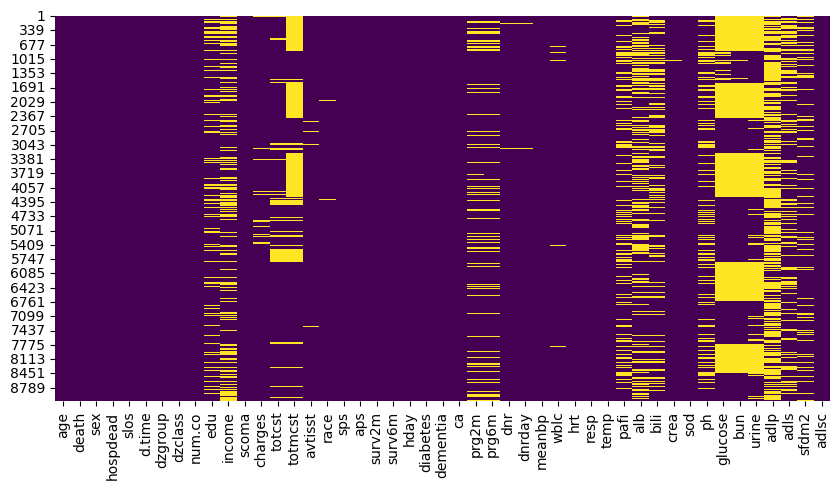

In [ ]:
# menampilkan visualisasi null value
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

In [ ]:
df.isnull().sum()

,0
age,0
death,0
sex,0
hospdead,0
slos,0
d.time,0
dzgroup,0
dzclass,0
num.co,0
edu,1634


In [ ]:
# cek null value
null_val = df.isnull().sum() * 100 / len(df)
null_val = null_val.sort_values(ascending=False)
null_val

# cek fitur null val > 30%
null_val[null_val > 30]

# drop fitur yg memiliki nilai null > 30%
null_feature_30 = null_val[null_val > 30].index
df.drop(null_feature_30, axis=1, inplace=True)

In [ ]:
# list fitur yg memiliki nilai null
null_feature = null_val[null_val < 30].index
null_feature

Index(['bili', 'pafi', 'ph', 'prg2m', 'edu', 'prg6m', 'sfdm2', 'totcst',
       'wblc', 'charges', 'avtisst', 'crea', 'race', 'dnrday', 'dnr', 'hrt',
       'meanbp', 'resp', 'sps', 'temp', 'sod', 'surv6m', 'surv2m', 'aps',
       'scoma', 'age', 'dementia', 'ca', 'death', 'diabetes', 'hday', 'num.co',
       'dzclass', 'dzgroup', 'd.time', 'slos', 'hospdead', 'sex', 'adlsc'],
      dtype='object')

In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df.isna().sum()

,0
age,0
death,0
sex,0
hospdead,0
slos,0
d.time,0
dzgroup,0
dzclass,0
num.co,0
edu,0


In [ ]:
df.columns

Index(['age', 'death', 'sex', 'hospdead', 'slos', 'd.time', 'dzgroup',
       'dzclass', 'num.co', 'edu', 'scoma', 'charges', 'totcst', 'avtisst',
       'race', 'sps', 'aps', 'surv2m', 'surv6m', 'hday', 'diabetes',
       'dementia', 'ca', 'prg2m', 'prg6m', 'dnr', 'dnrday', 'meanbp', 'wblc',
       'hrt', 'resp', 'temp', 'pafi', 'bili', 'crea', 'sod', 'ph', 'sfdm2',
       'adlsc'],
      dtype='object')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,age,death,hospdead,slos,d.time,num.co,edu,scoma,charges,totcst,...,wblc,hrt,resp,temp,pafi,bili,crea,sod,ph,adlsc
count,9105.000000,9105.000000,9105.000000,9105.000000,9105.000000,9105.000000,9105.000000,9105.000000,9.105000e+03,9105.000000,...,9105.000000,9105.00000,9105.000000,9105.000000,9105.000000,9105.000000,9105.000000,9105.000000,9105.000000,9105.000000
mean,62.650823,0.681054,0.259198,17.863042,478.449863,1.868644,9.639429,12.057221,5.886242e+04,27819.456942,...,12.060175,97.14604,23.327732,37.099266,178.364316,1.824737,1.757929,137.553432,5.555211,1.888272
std,15.593710,0.466094,0.438219,22.006440,560.383272,1.344409,5.484353,24.635665,1.020021e+05,44442.074071,...,9.345216,31.57398,9.576397,1.310732,140.946745,4.640728,1.686631,6.198977,3.215515,2.003763
min,18.041990,0.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.797000,0.000000,0.000000,6.000000,26.000000,1.000000,8.000000,0.000000,9.280000e+03,4296.539100,...,6.699219,72.00000,18.000000,36.195310,0.000000,0.000000,0.899902,134.000000,0.000000,0.000000
50%,64.856990,1.000000,0.000000,11.000000,233.000000,2.000000,12.000000,0.000000,2.404400e+04,11940.750000,...,10.398438,100.00000,24.000000,36.695310,177.125000,0.599976,1.199951,137.000000,7.399414,1.000000
75%,73.998960,1.000000,1.000000,20.000000,761.000000,3.000000,12.000000,9.000000,6.353100e+04,32445.140600,...,15.099609,120.00000,28.000000,38.195310,274.250000,1.299805,1.899902,141.000000,7.449219,3.000000
max,101.847960,1.000000,1.000000,343.000000,2029.000000,9.000000,31.000000,100.000000,1.435423e+06,633212.000000,...,200.000000,300.00000,90.000000,41.695310,890.375000,63.000000,21.500000,181.000000,7.769531,7.073242


In [ ]:
df.dtypes

,0
age,float64
death,int64
sex,object
hospdead,int64
slos,int64
d.time,int64
dzgroup,object
dzclass,object
num.co,int64
edu,float64


### DATA REDUCTION (PCA)

In [ ]:
# mengatur seed untuk memastikan hasil yang sama setiap kali kode dijalankan
np.random.seed(42)
data = np.random.rand(80, 4) # membuat dataset acak dengan 80 baris dan 4 fitur
pca = PCA(n_components=2)
low_dimensional_data = pca.fit_transform(data) # mengubah data ke dimensi yang lebih rendah (dari 4 fitur menjadi 2 fitur utama)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("low-dimensional Data:")
print(low_dimensional_data)

Explained Variance Ratio: [0.30833375 0.27883257]
low-dimensional Data:
[[-0.39598056  0.31548852]
 [-0.04151737 -0.20874186]
 [ 0.07751931  0.47329581]
 [ 0.59938271 -0.14243089]
 [-0.04616216 -0.13914885]
 [ 0.3457809  -0.23895916]
 [ 0.01649581  0.25158094]
 [ 0.27094298 -0.43638127]
 [-0.80853201  0.2282261 ]
 [-0.0848882  -0.43027458]
 [-0.18082383  0.05459042]
 [-0.14304324  0.0536232 ]
 [-0.20213065 -0.13877558]
 [-0.0181199   0.69374539]
 [ 0.09227045 -0.43622524]
 [-0.12626562 -0.30849966]
 [-0.09947809  0.11013172]
 [-0.50337292  0.02714384]
 [-0.64810032  0.09319   ]
 [ 0.53522966 -0.32513941]
 [ 0.45188065  0.11906702]
 [-0.24734719 -0.17571958]
 [ 0.39942242  0.31147932]
 [ 0.02573707  0.15477113]
 [ 0.41246401 -0.14081748]
 [-0.29441352 -0.08022256]
 [ 0.32528704  0.13670017]
 [ 0.16517127 -0.55585386]
 [ 0.00307347  0.59778688]
 [ 0.10252353 -0.10499325]
 [ 0.31232643  0.32156847]
 [-0.46315177 -0.05373727]
 [-0.22273833 -0.31952466]
 [-0.38666997 -0.41327842]
 [-0.15438

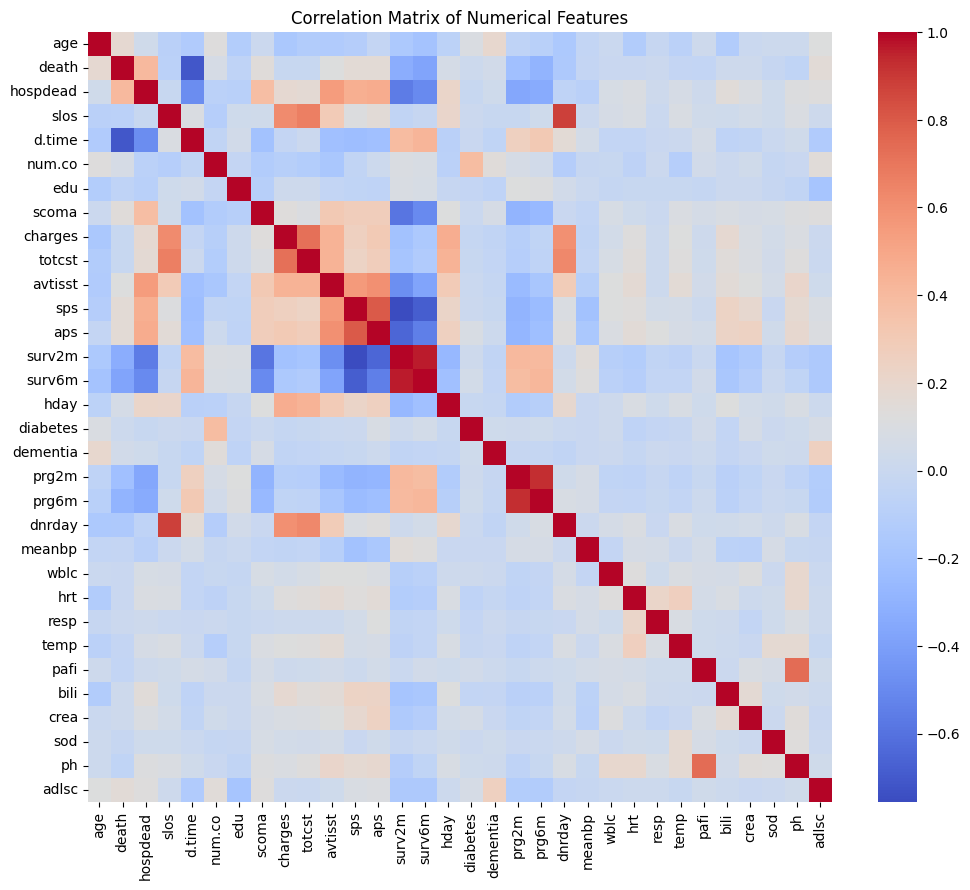

In [ ]:
plt.figure(figsize=(12, 10)) # membuat visualisasi korelasi antar fitur numerik menggunakan heatmap
numerical_df = df.select_dtypes(include=np.number) # memilih hanya kolom numerik untuk perhitungan korelasi
sns.heatmap(numerical_df.corr(), annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

###EDA


<class 'pandas.core.frame.DataFrame'>
Index: 9105 entries, 1 to 9105
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       9105 non-null   float64
 1   death     9105 non-null   int64  
 2   sex       9105 non-null   object 
 3   hospdead  9105 non-null   int64  
 4   slos      9105 non-null   int64  
 5   d.time    9105 non-null   int64  
 6   dzgroup   9105 non-null   object 
 7   dzclass   9105 non-null   object 
 8   num.co    9105 non-null   int64  
 9   edu       9105 non-null   float64
 10  scoma     9105 non-null   float64
 11  charges   9105 non-null   float64
 12  totcst    9105 non-null   float64
 13  avtisst   9105 non-null   float64
 14  race      9105 non-null   object 
 15  sps       9105 non-null   float64
 16  aps       9105 non-null   float64
 17  surv2m    9105 non-null   float64
 18  surv6m    9105 non-null   float64
 19  hday      9105 non-null   int64  
 20  diabetes  9105 non-null   int64  
 

None

,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,edu,...,hrt,resp,temp,pafi,bili,crea,sod,ph,sfdm2,adlsc
1,62.84998,0,male,0,5,2029,Lung Cancer,Cancer,0,11.0,...,69.0,22.0,36.00000,388.00000,0.199982,1.199951,141.0,7.459961,0,7.0
2,60.33899,1,female,1,4,4,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,...,112.0,34.0,34.59375,98.00000,0.000000,5.500000,132.0,7.250000,<2 mo. follow-up,1.0
3,52.74698,1,female,0,17,47,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,...,88.0,28.0,37.39844,231.65625,2.199707,2.000000,134.0,7.459961,<2 mo. follow-up,0.0
4,42.38498,1,female,0,3,133,Lung Cancer,Cancer,2,11.0,...,88.0,32.0,35.00000,0.00000,0.000000,0.799927,139.0,0.000000,no(M2 and SIP pres),0.0
5,79.88495,0,female,0,16,2029,ARF/MOSF w/Sepsis,ARF/MOSF,1,0.0,...,112.0,20.0,37.89844,173.31250,0.000000,0.799927,143.0,7.509766,no(M2 and SIP pres),2.0


,age,death,hospdead,slos,d.time,num.co,edu,scoma,charges,totcst,...,wblc,hrt,resp,temp,pafi,bili,crea,sod,ph,adlsc
count,9105.000000,9105.000000,9105.000000,9105.000000,9105.000000,9105.000000,9105.000000,9105.000000,9.105000e+03,9105.000000,...,9105.000000,9105.00000,9105.000000,9105.000000,9105.000000,9105.000000,9105.000000,9105.000000,9105.000000,9105.000000
mean,62.650823,0.681054,0.259198,17.863042,478.449863,1.868644,9.639429,12.057221,5.886242e+04,27819.456942,...,12.060175,97.14604,23.327732,37.099266,178.364316,1.824737,1.757929,137.553432,5.555211,1.888272
std,15.593710,0.466094,0.438219,22.006440,560.383272,1.344409,5.484353,24.635665,1.020021e+05,44442.074071,...,9.345216,31.57398,9.576397,1.310732,140.946745,4.640728,1.686631,6.198977,3.215515,2.003763
min,18.041990,0.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.797000,0.000000,0.000000,6.000000,26.000000,1.000000,8.000000,0.000000,9.280000e+03,4296.539100,...,6.699219,72.00000,18.000000,36.195310,0.000000,0.000000,0.899902,134.000000,0.000000,0.000000
50%,64.856990,1.000000,0.000000,11.000000,233.000000,2.000000,12.000000,0.000000,2.404400e+04,11940.750000,...,10.398438,100.00000,24.000000,36.695310,177.125000,0.599976,1.199951,137.000000,7.399414,1.000000
75%,73.998960,1.000000,1.000000,20.000000,761.000000,3.000000,12.000000,9.000000,6.353100e+04,32445.140600,...,15.099609,120.00000,28.000000,38.195310,274.250000,1.299805,1.899902,141.000000,7.449219,3.000000
max,101.847960,1.000000,1.000000,343.000000,2029.000000,9.000000,31.000000,100.000000,1.435423e+06,633212.000000,...,200.000000,300.00000,90.000000,41.695310,890.375000,63.000000,21.500000,181.000000,7.769531,7.073242


,sex,dzgroup,dzclass,race,ca,dnr,sfdm2
count,9105,9105,9105,9105,9105,9105,9105
unique,2,8,4,6,3,4,6
top,male,ARF/MOSF w/Sepsis,ARF/MOSF,white,no,no dnr,<2 mo. follow-up
freq,5125,3515,4227,7191,5995,5880,3123


Missing values:


,0
age,0
death,0
sex,0
hospdead,0
slos,0
d.time,0
dzgroup,0
dzclass,0
num.co,0
edu,0


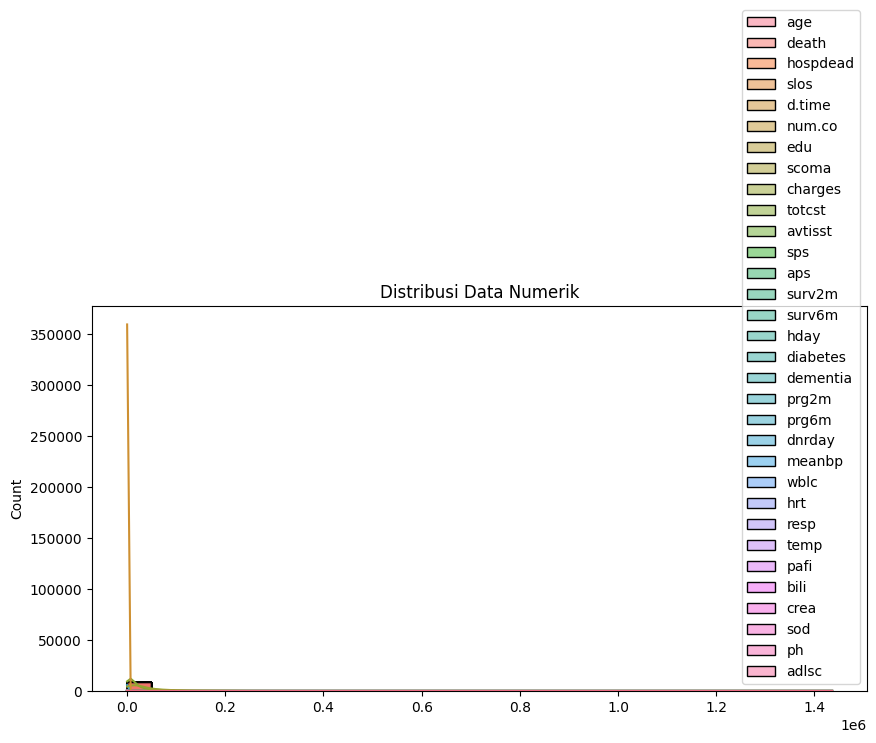

<ipython-input-24-6bb407928788>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='coolwarm')


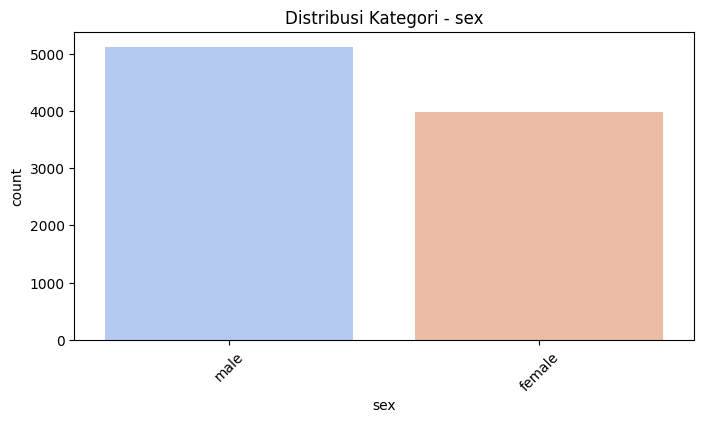

<ipython-input-24-6bb407928788>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='coolwarm')


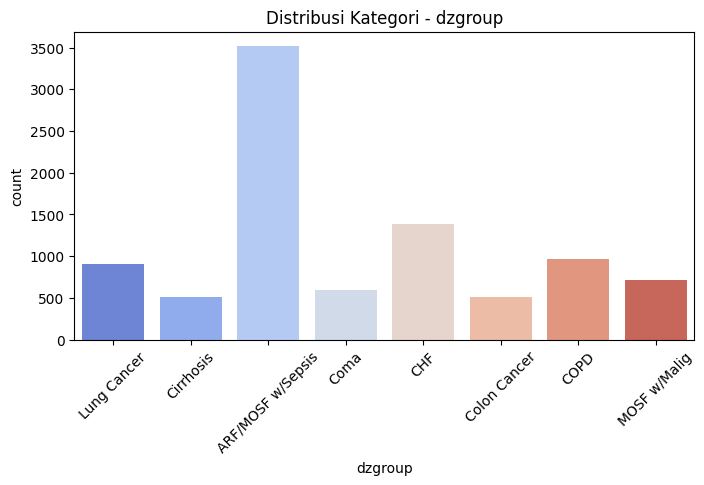

<ipython-input-24-6bb407928788>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='coolwarm')


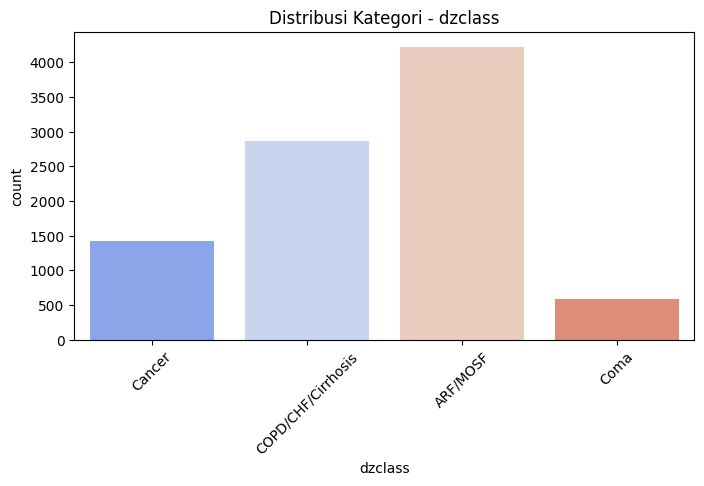

<ipython-input-24-6bb407928788>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='coolwarm')


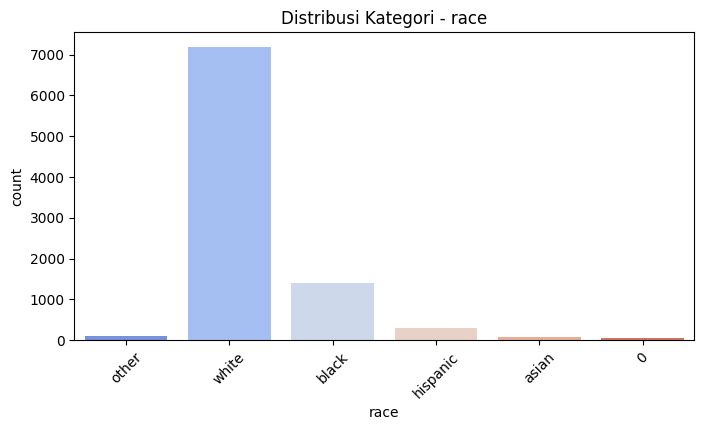

<ipython-input-24-6bb407928788>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='coolwarm')


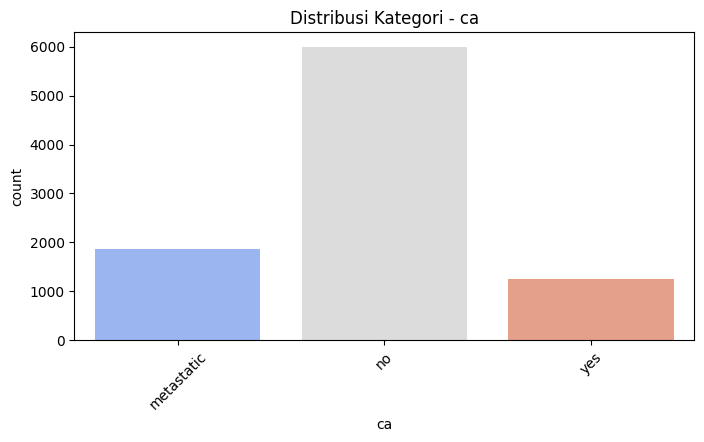

<ipython-input-24-6bb407928788>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='coolwarm')


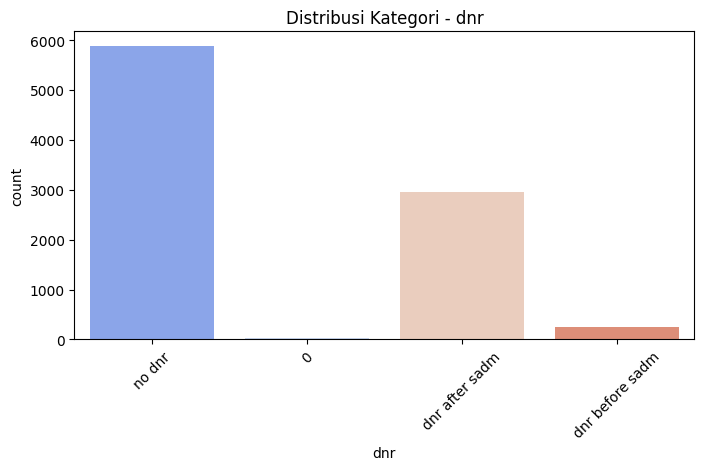

<ipython-input-24-6bb407928788>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='coolwarm')


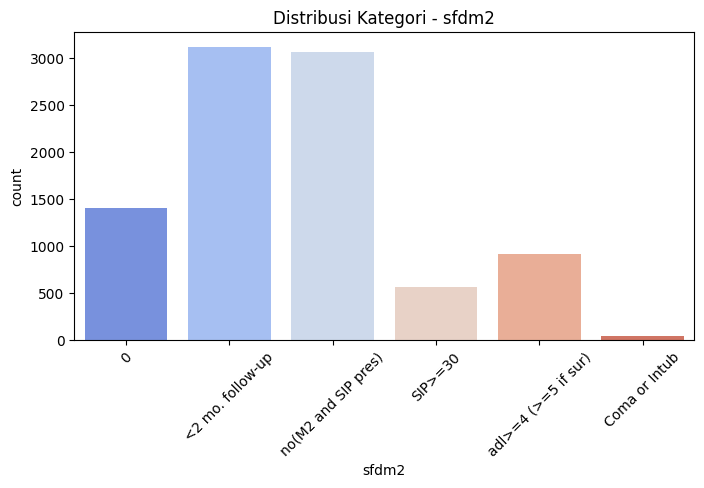

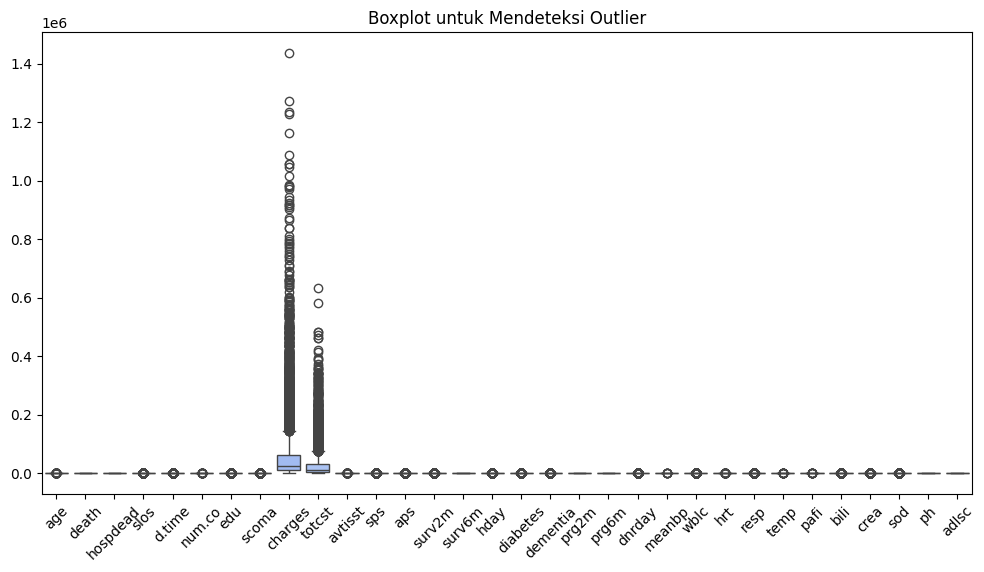

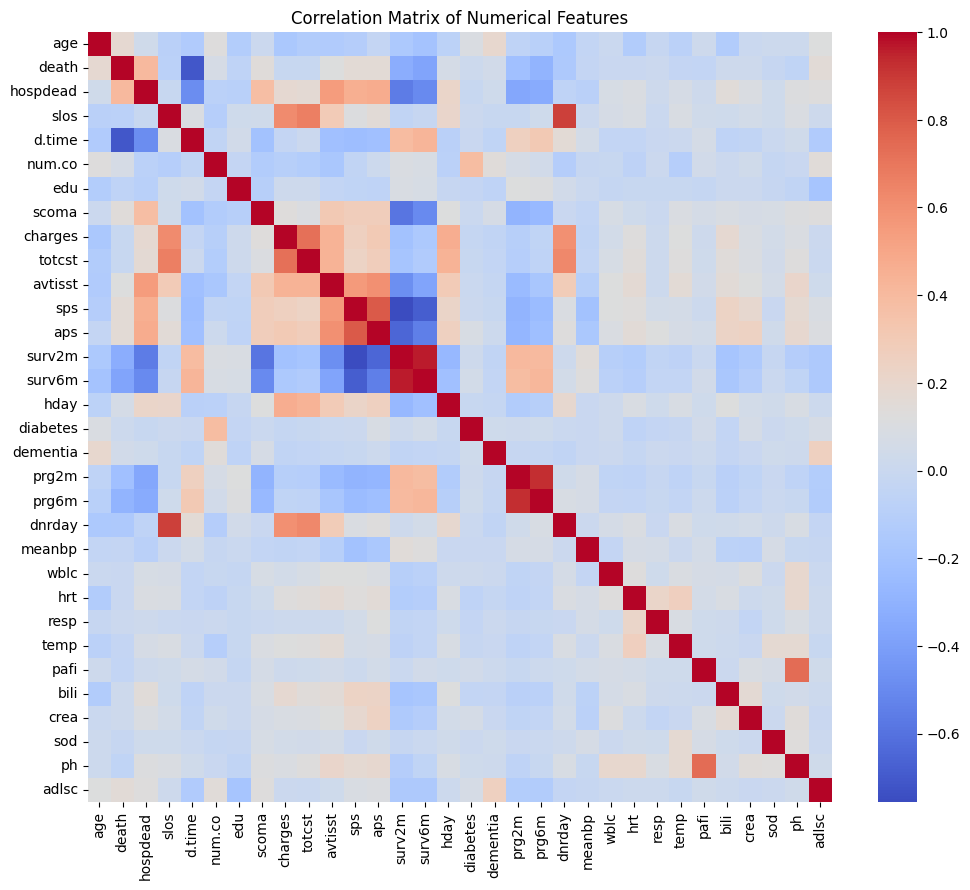

In [ ]:
# cek info dataset
display(df.info())
display(df.head())

# statistik deskriptif untuk data numerik
display(df.describe())

# statistik deskriptif untuk data kategorikal seperti jumlah nilai unik dan modus
display(df.describe(include=['object']))

# cek missing values
print("Missing values:")
display(df.isnull().sum())

# visualisasi distribusi data numerik
# membantu memahami distribusi dari fitur numerik, apakah normal atau ada skewness
plt.figure(figsize=(10, 5))
sns.histplot(df.select_dtypes(include=[np.number]), bins=30, kde=True)
plt.title("Distribusi Data Numerik")
plt.show()

# visualisasi distribusi data kategorikal
# menampilkan jumlah kemunculan setiap kategori dalam fitur kategorikal untuk melihat distribusinya
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[col], palette='coolwarm')
    plt.title(f'Distribusi Kategori - {col}')
    plt.xticks(rotation=45)
    plt.show()

# boxplot untuk melihat outlier pada fitur numerik, yaitu data yang jauh dari nilai mayoritas
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=[np.number]), palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Boxplot untuk Mendeteksi Outlier")
plt.show()

# heatmap korelasi untuk fitur numerik
# menampilkan hubungan antar fitur numerik dengan menggunakan korelasi
# korelasi tinggi antara dua fitur dapat menunjukkan redundansi
plt.figure(figsize=(12, 10))
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### DATA TRANSFORMATION

In [ ]:
# pilih fitur numerik dan target
# target_col menyimpan nama kolom yang akan dijadikan target (label)
target_col = "death"
numerical_features = df.select_dtypes(include=["float64", "int64"]).columns.tolist()

# hapus kolom target dari fitur, karena target tidak boleh digunakan sebagai prediktor
numerical_features.remove(target_col)

# missing values dengan imputasi median untuk fitur numerik
# data yang hilang akan diisi dengan median dari masing-masing kolom agar tetap mewakili distribusi data
df_cleaned = df.copy()
df_cleaned[numerical_features] = df_cleaned[numerical_features].fillna(df_cleaned[numerical_features].median())

# misahin fitur dan target
X = df_cleaned[numerical_features]
y = df_cleaned[target_col]

# scaling pada fitur numerik
# standardScaler melakukan normalisasi dengan mengubah data menjadi distribusi standar (mean=0, std=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# mengubah hasil scaling menjadi DataFrame agar lebih mudah dibaca
X_scaled_df = pd.DataFrame(X_scaled, columns=numerical_features)
# menampilkan 5 baris pertama dari dataset yang telah dinormalisasi
display(X_scaled_df.head())


,age,hospdead,slos,d.time,num.co,edu,scoma,charges,totcst,avtisst,...,wblc,hrt,resp,temp,pafi,bili,crea,sod,ph,adlsc
0,0.012772,-0.591514,-0.584545,2.767098,-1.390013,0.248096,-0.489448,-0.481854,-0.626006,-1.154549,...,-0.648514,-0.891480,-0.138654,-0.838712,1.487421,-0.350127,-0.330842,0.556020,0.592395,2.551205
1,-0.148262,1.690577,-0.629988,-0.846699,0.097711,0.430443,1.296678,-0.238895,-0.626006,0.494026,...,0.539073,0.470475,1.114496,-1.911645,-0.570206,-0.393222,2.218788,-0.895912,0.527095,-0.443326
2,-0.635153,-0.591514,-0.039220,-0.769962,0.097711,0.430443,-0.489448,-0.174206,-0.626006,-0.704937,...,-0.380983,-0.289686,0.487921,0.228262,0.378121,0.080804,0.143531,-0.573260,0.592395,-0.942415
3,-1.299688,-0.591514,-0.675432,-0.616487,0.097711,0.248096,-0.489448,-0.546954,-0.626006,-1.154549,...,-0.316817,-0.289686,0.905637,-1.601686,-1.265543,-0.393222,-0.568029,0.233369,-1.727722,-0.942415
4,1.105258,-0.591514,-0.084664,2.767098,-0.646151,-1.757720,0.565990,-0.085644,-0.626006,-0.280305,...,0.154079,0.470475,-0.347512,0.609749,-0.035844,-0.393222,-0.568029,0.878672,0.607885,0.055762


### DATA MODELING

In [ ]:
# split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# buat model KNN dengan hyperparameter default
# model ini bekerja dengan mencari titik data terdekat untuk menentukan label dari data baru
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# prediksi data uji
y_pred = model.predict(X_test)

# evaluasi model
# evaluasi model dengan akurasi dan classification report
# akurasi menunjukkan seberapa baik model dalam mengklasifikasikan data dengan bena
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.8204
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.64      0.70       594
           1       0.84      0.91      0.87      1227

    accuracy                           0.82      1821
   macro avg       0.80      0.77      0.79      1821
weighted avg       0.82      0.82      0.82      1821



### DATA VISUALISASI

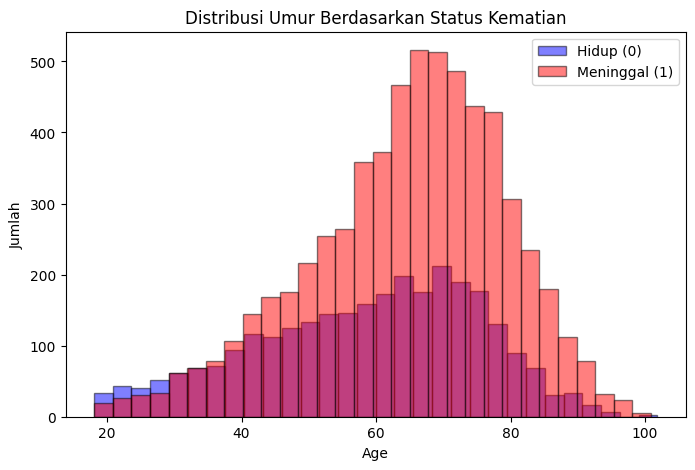

In [ ]:
# histogram
# visualisasi distribusi umur berdasarkan status kematian
# grafik ini membantu memahami apakah ada pola tertentu pada usia pasien yang masih hidup atau meninggal
plt.figure(figsize=(8, 5))
plt.hist(X[y == 0]["age"], bins=30, alpha=0.5, label="Hidup (0)", color="blue", edgecolor="black")
plt.hist(X[y == 1]["age"], bins=30, alpha=0.5, label="Meninggal (1)", color="red", edgecolor="black")
plt.title("Distribusi Umur Berdasarkan Status Kematian")
plt.xlabel("Age")
plt.ylabel("Jumlah")
plt.legend()
plt.show()